In [41]:
%matplotlib inline

In [42]:
import seaborn
seaborn.set()

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop

from sklearn.model_selection import train_test_split

In [45]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [46]:
test_images = test.values.astype('float32')

In [47]:
train_images = (train.ix[:,1:].values).astype('float32')
train_labels = train.ix[:, 0].values.astype('int32')

C:\Users\Tural\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [48]:
train_images_reshaped = train_images.reshape(train_images.shape[0], 28, 28)
train_images_reshaped.shape

for i in range(9):
    plt.subplot(330 + (i+1)) 
    plt.imshow(train_images_reshaped[i])#, cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i]);

(42000, 28, 28)

In [49]:
#Normalizing pixel values
train_images = train_images / 255
test_images = test_images / 255

In [50]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)

In [51]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=(28 * 28)))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
history=model.fit(
    train_images, 
    train_labels, 
    validation_split = 0.05, 
    epochs=25,
    batch_size=64)

Train on 39900 samples, validate on 2100 samples
Epoch 1/25
39900/39900 [==============================] - 3s 70us/step - loss: 0.5353 - acc: 0.8509 - val_loss: 0.2846 - val_acc: 0.9248
Epoch 2/25
39900/39900 [==============================] - 2s 49us/step - loss: 0.2301 - acc: 0.9328 - val_loss: 0.2403 - val_acc: 0.9295
Epoch 3/25
39900/39900 [==============================] - 2s 53us/step - loss: 0.1845 - acc: 0.9460 - val_loss: 0.2027 - val_acc: 0.9419
Epoch 4/25
39900/39900 [==============================] - 2s 54us/step - loss: 0.1553 - acc: 0.9536 - val_loss: 0.1853 - val_acc: 0.9500
Epoch 5/25
39900/39900 [==============================] - 2s 49us/step - loss: 0.1373 - acc: 0.9585 - val_loss: 0.1679 - val_acc: 0.9500
Epoch 6/25
39900/39900 [==============================] - 2s 46us/step - loss: 0.1215 - acc: 0.9638 - val_loss: 0.1690 - val_acc: 0.9529
Epoch 7/25
39900/39900 [==============================] - 2s 45us/step - loss: 0.1099 - acc: 0.9666 - val_loss: 0.1531 - val_acc:

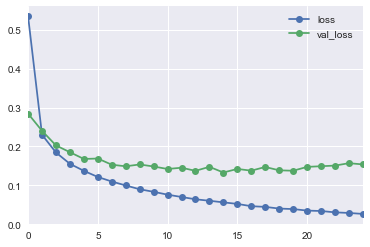

In [55]:
df=pd.DataFrame(history.history)

df[['loss','val_loss']].plot(marker='o')

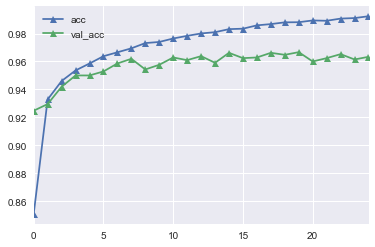

In [56]:
df[['acc','val_acc']].plot(marker='^')

overfitting after epoch 15

In [57]:
#Start over
model = Sequential([
    Dense(64, activation='relu', input_dim=(28 * 28)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
        Dropout(0.4),
    Dense(10, activation='softmax')
])

In [58]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
    train_images, 
    train_labels, 
    validation_split = 0.01, 
    epochs=25, batch_size=64, verbose=0
)

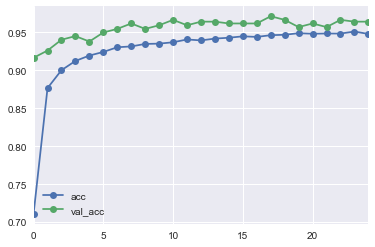

In [59]:
pd.DataFrame(history.history)[['acc','val_acc']].plot(marker='o')

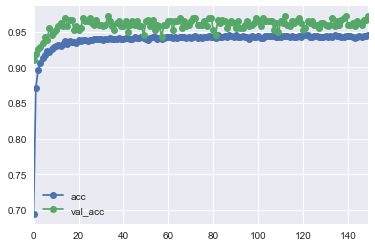

In [61]:
from keras.constraints import maxnorm

model = Sequential([
    Dense(64, activation='relu', input_dim=(28 * 28),kernel_constraint=maxnorm(2.)),
    Dropout(0.4),
    Dense(64, activation='relu',kernel_constraint=maxnorm(2.)),
    Dropout(0.4),
    Dense(64, activation='relu',kernel_constraint=maxnorm(2.)),
    Dropout(0.4),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history=model.fit(
    train_images, 
    train_labels, 
    validation_split = 0.01, 
    epochs=150, batch_size=64, verbose=0
)


pd.DataFrame(history.history)[['acc','val_acc']].plot(marker='o')

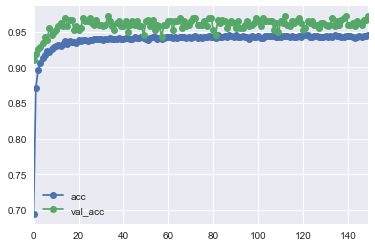

In [62]:
df=pd.DataFrame(history.history)[['acc','val_acc']].plot(marker='o')

In [246]:
pred = model.predict(test_images, batch_size=None, verbose=0, steps=None)

In [247]:
res = []
for i in range(len(pred)):
    res.append(pred[i].argmax())

In [248]:
import csv

f = list(range(1, pred.shape[0]))

myFile = open('result.csv', 'w')
myFile.write("ImageId,Label\n")
rows = ['']*pred.shape[0]

for num in range(0, pred.shape[0]):
    rows[num] = "%d,%d\n"%(num+1,res[num])
    

myFile.writelines(rows)
myFile.close()